<a href="https://colab.research.google.com/github/Kexue-Charlene/INDE577/blob/main/Supervised%20Learning/Decision%20Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

Decision Tree is one of the most widely used supervised machine learning algorithm. Decision tree learning is used for classification and regression. The decision tree algorithm works like a human brain every time we ask a question ourselves before making a certain decision. For example, older than 30? If yes, eat pizza? If no, exercise. The decision tree takes the training set and split up it into the smaller subsets based on features.




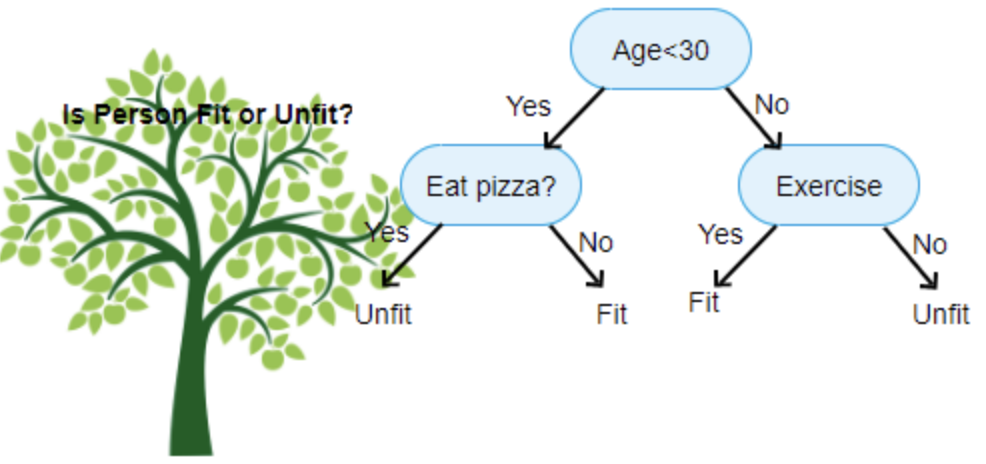

## Decision Tree Algorithm
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. 

How does the decision tree algorithm work?
1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
    * All the tuples belong to the same attribute value.
    * There are no more remaining attributes.
    * There are no more instances.


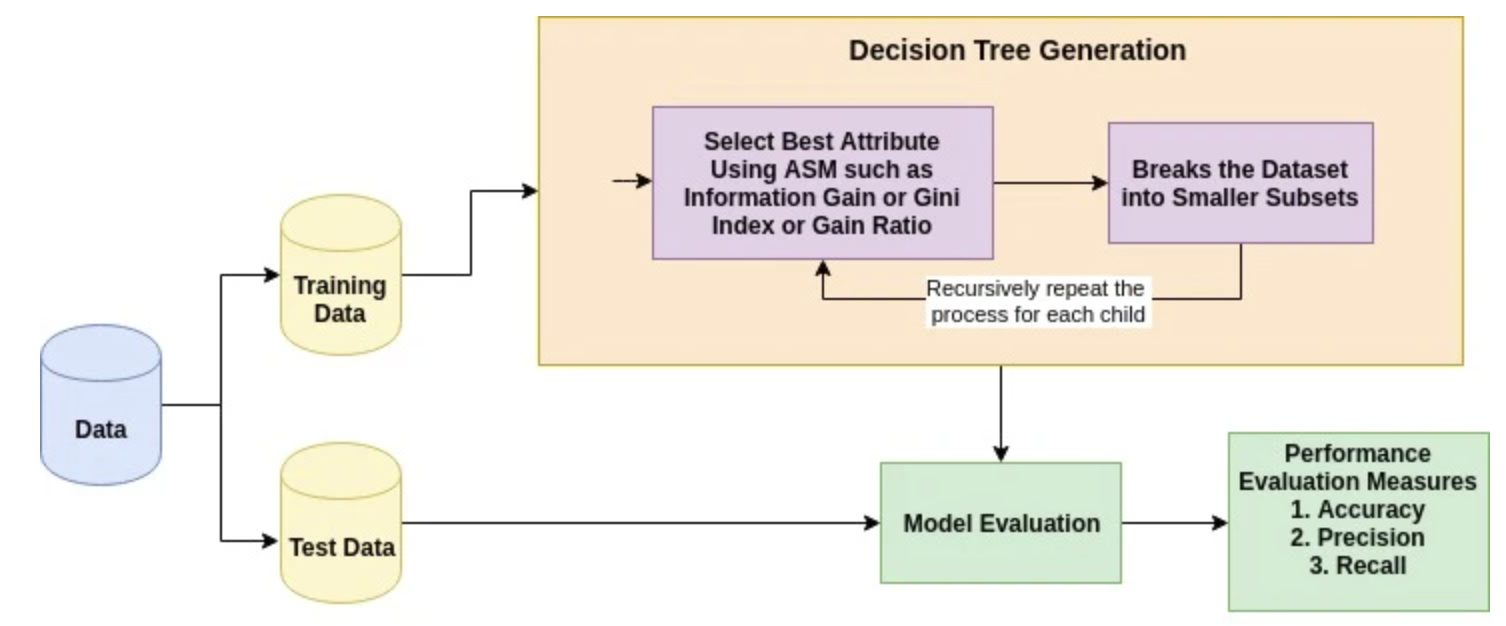

The following packages will be used in this project:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


## Data information
The dataset is about diabetes which is downloaded from [Here](https://www.kaggle.com/abdallamahgoub/diabetes)
Parameters:
* The number of pregnancies
* Glucose
* Blood Pressure
* SkinThickness
* Insulin
* BMI
* Pedigree
* Age
* Outcome: 1= diabetes, 0= not diabetes. 


In [ ]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Select BMI and Glucose as the x and y axis displays the following plot. The blue points mean that the person has diabetes; the red points mean that the person doesn't have diabetes. 

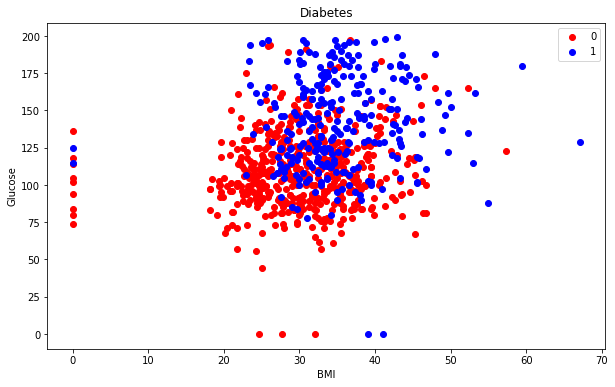

In [ ]:
X = df[["BMI", "Glucose"]].to_numpy()
y = df["Outcome"].to_numpy()
plt.figure(figsize=(10,6))

plt.scatter(X[y==0][:,0],X[y==0][:,1],color="red",label="0")
plt.scatter(X[y==1][:,0],X[y==1][:,1],color="blue",label="1")
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Diabetes')
plt.legend()

Divide the dataset into training data and testing data and then plot the training data.  

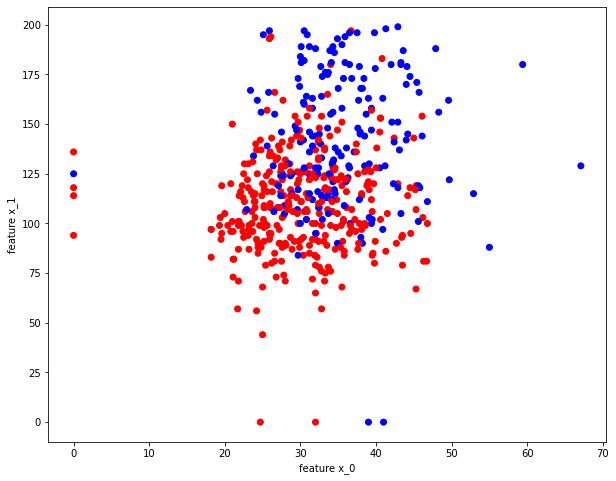

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)
c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

Listed the features and labels

In [ ]:
features = ["x_0", "x_1"]
labels = ["red", "blue"]

Apply decision tree classifier to traning set. 

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Visuallized decision tree with index

We can see the flowcart which split condition of each node with information gain. Gini method is used to creat split points. The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. 

$Gini(D)=1-\sum_{i = 1}^m Pi^2$  where, Pi is the probability that a tuple in D belongs to class Ci.

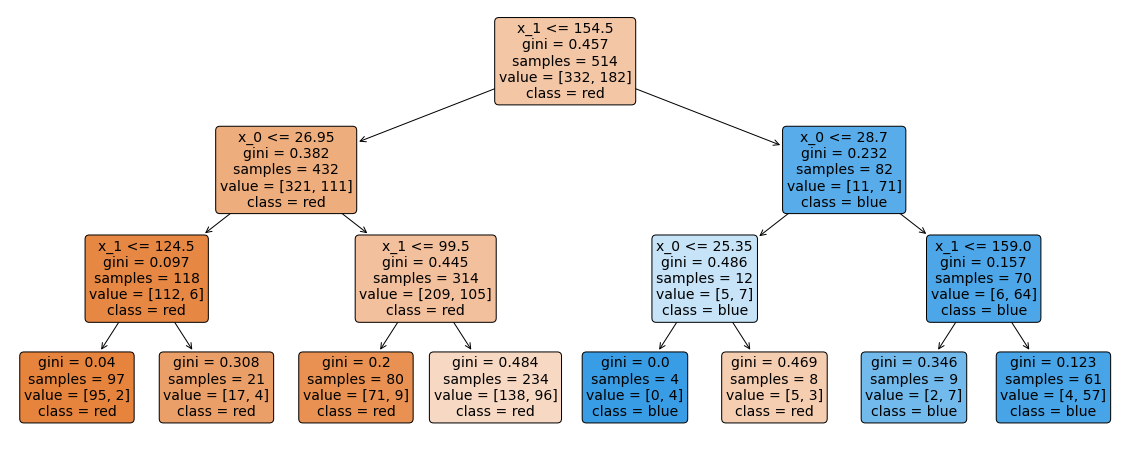

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

The split rules are listed below

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- x_1 <= 154.50
|   |--- x_0 <= 26.95
|   |   |--- x_1 <= 124.50
|   |   |   |--- class: 0
|   |   |--- x_1 >  124.50
|   |   |   |--- class: 0
|   |--- x_0 >  26.95
|   |   |--- x_1 <= 99.50
|   |   |   |--- class: 0
|   |   |--- x_1 >  99.50
|   |   |   |--- class: 0
|--- x_1 >  154.50
|   |--- x_0 <= 28.70
|   |   |--- x_0 <= 25.35
|   |   |   |--- class: 1
|   |   |--- x_0 >  25.35
|   |   |   |--- class: 0
|   |--- x_0 >  28.70
|   |   |--- x_1 <= 159.00
|   |   |   |--- class: 1
|   |   |--- x_1 >  159.00
|   |   |   |--- class: 1



## Decision boundaries

The following graph shows the decision boundaries from training data. The large background is colored as red which belonged to a class. The small background is colored as blue. There are many overlap points in red area but colored as blue. 

Text(0.5, 1.0, 'Training Data')

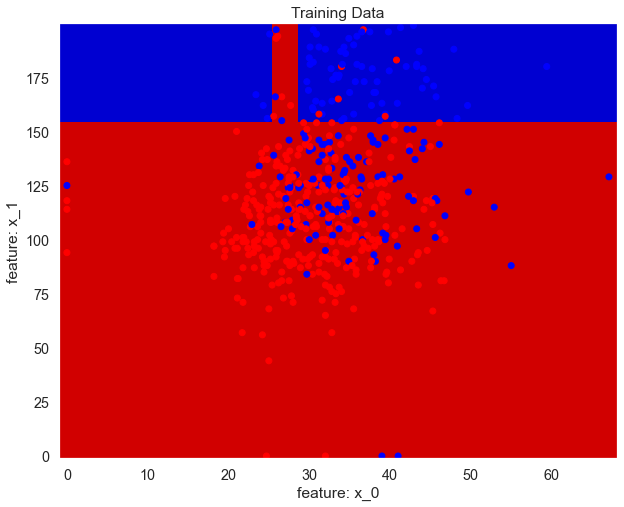

In [ ]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")
plt.title("Training Data")

## Confusion Matrix
A confusion matrix is a table to define the performance of a classification algorithm. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

* “true positive” for correctly predicted event values.
* “false positive” for incorrectly predicted event values.
* “true negative” for correctly predicted no-event values.
* “false negative” for incorrectly predicted no-event values.


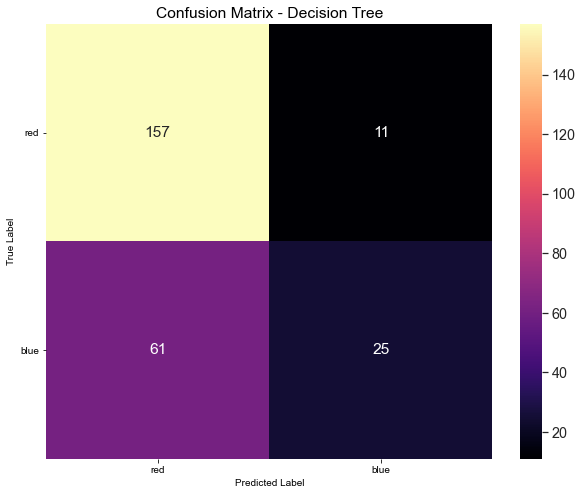

In [ ]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels, rotation=0)
plt.show()

## Apply to testing data

Here we apply it on testing data. 

Text(0, 0.5, 'feature: x_1')

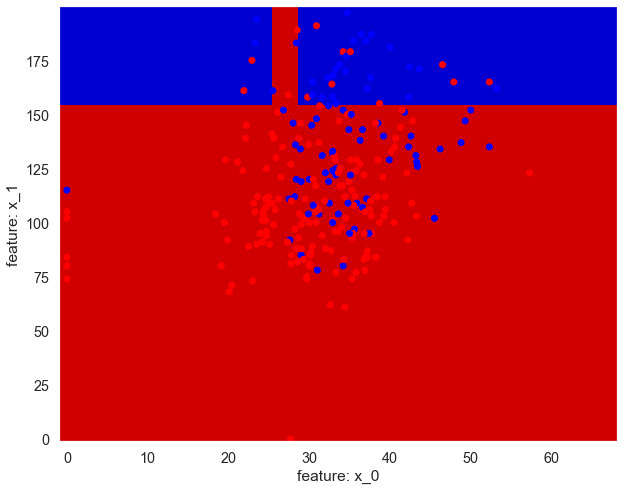

In [ ]:
# Set a plot_step
plot_step = 0.02


plt.figure(figsize=(10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='jet_r')

plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test)
plt.xlabel("feature: x_0")
plt.ylabel("feature: x_1")

Besides that, we also calculate the accuracy score and precision which is 71.6% percent. For red class, the precision is 72%, and for blue class, the precision is 69%. 

In [ ]:
print(f"accuracy score = {metrics.accuracy_score(y_test, test_pred_decision_tree)}")
print(f"precision score")

precision = metrics.precision_score(y_test, 
                                    test_pred_decision_tree,
                                   average = None)

precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns={0:"precision"}, inplace=True)
precision_results

accuracy score = 0.7165354330708661
precision score


,precision
red,0.720183
blue,0.694444


Here is the table of classification report with precision, recall, f1-score and support. 
The results are pretty good. 


In [ ]:
# Recall and the f1-score (look them up!)

print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       168
           1       0.69      0.29      0.41        86

    accuracy                           0.72       254
   macro avg       0.71      0.61      0.61       254
weighted avg       0.71      0.72      0.68       254



# Reference 

Akshay, Chavan. AI TIME JOURNAL, A Comprehensive Guide to Decision Tree Learning, Feb,7,2019. https://www.aitimejournal.com/@akshay.chavan/a-comprehensive-guide-to-decision-tree-learning

Jason, Brownlee. What is a Confusion Matrix in Machine Learning, Nov,18,2016. https://machinelearningmastery.com/confusion-matrix-machine-learning/

Avinash, Navlani. Decision Tree Classification in Python. Dec,28th,2018. https://www.datacamp.com/community/tutorials/decision-tree-classification-python
